In [ ]:
!pip install tensorflow


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.17.1


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:,13]

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [ ]:
print(X['Geography'].dtype)
print(X['Gender'].dtype)


object
object


In [ ]:
print(X['Geography'].unique())
print(X['Gender'].unique())

['France' 'Spain' 'Germany']
['Female' 'Male']


In [ ]:
geography = pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)

print(geography.head())
print(gender.head())

   Germany  Spain
0    False  False
1    False   True
2    False  False
3    False  False
4    False   True
    Male
0  False
1  False
2  False
3  False
4  False


In [ ]:
geography = geography.astype(int)
gender = gender.astype(int)

print(geography.head())
print(gender.head())

   Germany  Spain
0        0      0
1        0      1
2        0      0
3        0      0
4        0      1
   Male
0     0
1     0
2     0
3     0
4     0


In [ ]:
X.drop(['Geography', 'Gender'], axis = 1, inplace = True)


In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [ ]:
X = pd.concat([X, geography, gender], axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
  #fit_transform only to training not ont esting dataset beacause of data leakage

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU,ReLU
from tensorflow.keras.layers import Dropout


In [ ]:
#SEQUENTIAL means we can do forward and backward propaagtion
###dense layer we create the layers


In [ ]:
classifier = Sequential()
##adding the input layer
classifier.add(Dense(units= 11, activation = 'relu'))

In [ ]:
## adding first hidden layer
classifier.add(Dense(units= 7, activation = 'relu'))


In [ ]:
classifier.add(Dense(units= 6, activation = 'relu'))

In [ ]:
#adding hte output lyar
classifier.add(Dense(units= 1, activation = 'sigmoid'))

In [ ]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
#by default adam uses learning rate = 0.01. if we want to provide out own learning rate
#import tensorflow
#opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)
#classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
#early stopping
early_stopping = tensorflow.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
model_history= classifier.fit(X_train, y_train, validation_split = 0.33, batch_size=10, epochs = 1000, callbacks = [early_stopping])

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8559 - loss: 0.3242 - val_accuracy: 0.8588 - val_loss: 0.3546
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8560 - loss: 0.3291 - val_accuracy: 0.8591 - val_loss: 0.3543
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8676 - loss: 0.3197 - val_accuracy: 0.8603 - val_loss: 0.3523
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8670 - loss: 0.3237 - val_accuracy: 0.8607 - val_loss: 0.3530
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8551 - loss: 0.3375 - val_accuracy: 0.8576 - val_loss: 0.3577
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8712 - loss: 0.3080 - val_accuracy: 0.8588 - val_loss: 0.3549
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8583 - loss: 0.3246 - val_accuracy: 0.8546 - val_loss: 0.3598
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8658 - loss: 0.3142 - 

In [ ]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Text(0.5, 0, 'epoch')

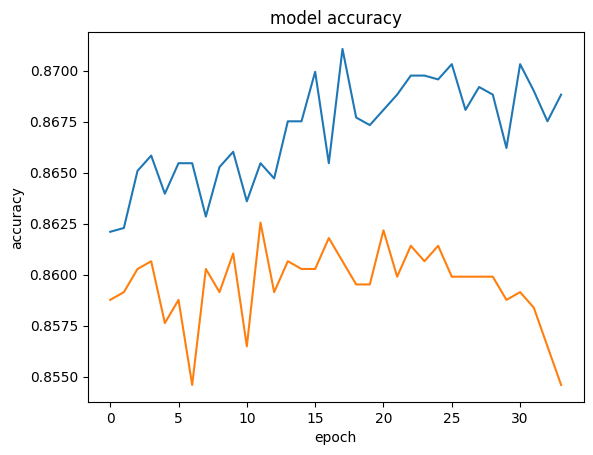

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

In [ ]:
y_pred= classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1512,   83],
       [ 201,  204]])

In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
score

0.858

In [ ]:
#get teh weights
classifier.get_weights()

[array([[-0.0441685 ,  0.16736802, -0.32207447, -0.00658565, -0.05523357,
          0.00521373,  0.15588133, -0.03922239, -0.06850491, -0.31043944,
          0.38217366],
        [ 0.18737957, -0.68584245, -0.49508843,  0.8702958 ,  0.6837383 ,
         -0.26664808, -0.3925726 , -0.76504475,  0.10442123, -0.31837168,
         -0.30342188],
        [-0.08041509,  0.02691431, -0.23513028,  0.06082307, -0.1469935 ,
          0.22039953,  0.17186837, -0.23851806,  0.1039298 ,  0.16244678,
          0.19264504],
        [ 0.2566537 ,  0.47489896, -0.47678903,  0.18714288, -0.11953916,
          0.30989742,  0.15585448, -0.13746369,  1.0421149 ,  0.58611274,
         -0.22714251],
        [ 1.4907076 , -0.00413492, -0.16175488,  0.8288786 , -0.5798706 ,
          0.60644966,  0.6571901 ,  0.71641797,  0.70247394,  0.2736812 ,
         -0.16844854],
        [-0.02282974,  0.13784671, -0.07432986, -0.11430003, -0.18439691,
          0.13174748, -0.32186073, -0.21137045, -0.02772701, -0.2196609

In [ ]:
#classifier.add(Dense(units = 7, activation = 'relu'))
#classifier.add(Dropout(0.2)) for dropout
